## Task 3 Model Explainability

### Load the data

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
import os

In [3]:
# Load data 
encoded_fraud_data_df = pd.read_csv('../data/encoded_fraud_data.csv')

creditcard_data = pd.read_csv('../data/creditcard.csv')

In [4]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:

encoded_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,key,transaction_frequency,...,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,732758368,0,1,0.0,...,False,False,False,False,False,False,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,350311387,0,1,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2621473820,1,1,0.0,...,False,False,False,False,False,False,False,False,True,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3840542443,0,1,0.0,...,False,False,False,False,False,False,False,False,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,415583117,0,1,0.0,...,False,False,False,False,False,False,False,False,False,True


In [6]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding device_id
label_encoder = LabelEncoder()
encoded_fraud_data_df['device_id_encoded'] = label_encoder.fit_transform(encoded_fraud_data_df['device_id'])

# Drop original device_id column if you encoded it
encoded_fraud_data_df.drop(columns=['device_id'], inplace=True)

In [7]:
encoded_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,key,transaction_frequency,velocity,...,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,0.679914,732758368,0,1,0.0,-0.160204,...,False,False,False,False,False,False,False,False,False,89215
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,2.304476,350311387,0,1,0.0,-1.142592,...,False,False,False,False,False,False,False,False,False,24078
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,2.304476,2621473820,1,1,0.0,-1.197169,...,False,False,False,False,False,False,False,True,False,131216
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,0.911994,3840542443,0,1,0.0,0.385567,...,False,False,False,False,False,False,False,False,True,3977
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,1.376155,415583117,0,1,0.0,0.112681,...,False,False,False,False,False,False,False,False,True,68757


In [8]:
# Convert signup_time and purchase_time to datetime if not already
encoded_fraud_data_df['signup_time'] = pd.to_datetime(encoded_fraud_data_df['signup_time'])
encoded_fraud_data_df['purchase_time'] = pd.to_datetime(encoded_fraud_data_df['purchase_time'])

# Extracting useful features
encoded_fraud_data_df['time_diff'] = (encoded_fraud_data_df['purchase_time'] - encoded_fraud_data_df['signup_time']).dt.total_seconds() / 3600  # time difference in hours
encoded_fraud_data_df['signup_hour'] = encoded_fraud_data_df['signup_time'].dt.hour  # hour of signup
encoded_fraud_data_df['purchase_hour'] = encoded_fraud_data_df['purchase_time'].dt.hour  # hour of purchase

encoded_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,key,transaction_frequency,velocity,...,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded,time_diff,signup_hour,purchase_hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,0.679914,732758368,0,1,0.0,-0.160204,...,False,False,False,False,False,False,89215,1251.856111,22,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,2.304476,350311387,0,1,0.0,-1.142592,...,False,False,False,False,False,False,24078,4.984444,20,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,2.304476,2621473820,1,1,0.0,-1.197169,...,False,False,False,False,True,False,131216,0.000278,18,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,0.911994,3840542443,0,1,0.0,0.385567,...,False,False,False,False,False,True,3977,136.690278,21,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,1.376155,415583117,0,1,0.0,0.112681,...,False,False,False,False,False,True,68757,1211.516944,7,18


In [9]:
# Dropping original device_id, signup_time, and purchase_time columns after feature extraction and encoding
encoded_fraud_data_df.drop(columns=['signup_time', 'purchase_time'], inplace=True)

In [10]:
# Separating features and target variable
x_fraud = encoded_fraud_data_df.drop(columns=['class'])
y_fraud = encoded_fraud_data_df['class']
print("Feature shape:", x_fraud.shape)
print("Target shape:", y_fraud.shape)

Feature shape: (151112, 201)
Target shape: (151112,)


In [11]:
# select boolean
boolcolumns = x_fraud.select_dtypes(include= 'bool').columns
x_fraud[boolcolumns] = x_fraud[boolcolumns].apply(lambda x: x.astype(int))

In [12]:
x_fraud.head()

,user_id,purchase_value,age,ip_address,key,transaction_frequency,velocity,hour_of_day,day_of_week,sex_M,...,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded,time_diff,signup_hour,purchase_hour
0,22058,-0.160204,0.679914,732758368,1,0.0,-0.160204,-1.377455,0.991020,1,...,0,0,0,0,0,0,89215,1251.856111,22,2
1,333320,-1.142592,2.304476,350311387,1,0.0,-1.142592,-1.522122,-1.501259,0,...,0,0,0,0,0,0,24078,4.984444,20,1
2,1359,-1.197169,2.304476,2621473820,1,0.0,-1.197169,0.937208,-0.005891,1,...,0,0,0,0,1,0,131216,0.000278,18,18
3,150084,0.385567,0.911994,3840542443,1,0.0,0.385567,0.213876,-1.501259,1,...,0,0,0,0,0,1,3977,136.690278,21,13
4,221365,0.112681,1.376155,415583117,1,0.0,0.112681,0.937208,-0.504347,1,...,0,0,0,0,0,1,68757,1211.516944,7,18


In [13]:
# For Credit Card Dataset
X_creditcard = creditcard_data.drop(columns=['Class'])  # Drop the target column
y_creditcard = creditcard_data['Class']  # Target column (fraud or not fraud)

In [14]:
from sklearn.model_selection import train_test_split
# For Fraud Dataset
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(x_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud)

# For Credit Card Dataset
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_creditcard, y_creditcard, test_size=0.2, random_state=42, stratify=y_creditcard)

print(y_train_fraud.value_counts())
print(y_train_credit.value_counts())



class
0    109568
1     11321
Name: count, dtype: int64
Class
0    227451
1       394
Name: count, dtype: int64


In [15]:
# Apply SMOTE for Fraud Data
smote_fraud = SMOTE(random_state=42)
X_train_fraud_resampled, y_train_fraud_resampled = smote_fraud.fit_resample(X_train_fraud, y_train_fraud)

# Apply SMOTE for Credit Card Data
smote_creditcard = SMOTE(random_state=42)
X_train_creditcard_resampled, y_train_credit_resampled = smote_creditcard.fit_resample(X_train_credit, y_train_credit)

c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-8\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-8\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3

## Working on the model explain ussing SHAP

In [16]:
import shap

shap.initjs()

c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-8\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the saved model to the data

In [17]:
import joblib
# Load saved models
# Gradient Boosting
xgb_creditcard = joblib.load('../models/dt_creditcard_model.pkl')
xgb_fraud = joblib.load('../models/dt_fraud_model.pkl')
# Logistic Regression
lr_creditcard = joblib.load('../models/lr_creditcard_model.pkl')
lr_fraud = joblib.load('../models/lr_fraud_model.pkl')
# Decision Tree
dt_creditcard = joblib.load('../models/dt_creditcard_model.pkl')
dt_fraud = joblib.load('../models/dt_fraud_model.pkl')
# Random Forest
rf_creditcard = joblib.load('../models/rf_creditcard_model.pkl')
rf_fraud = joblib.load('../models/rf_fraud_model.pkl')
# MLP
mlp_creditcard = joblib.load('../models/mlp_creditcard_model.pkl')
mlp_fraud = joblib.load('../models/mlp_fraud_model.pkl')

In [ ]:
# Initialize SHAP Explainers for MLP
explainer_credit = shap.TreeExplainer(mlp_creditcard)
shap_values_credit = explainer_credit.shap_values(X_test_credit)

explainer_fraud = shap.TreeExplainer(mlp_fraud)
shap_values_fraud = explainer_fraud.shap_values(X_test_fraud)

## Model Explain for Logistic Regression

In [ ]:
# Initialize SHAP Linear Explainer
lr_explainer_credit = shap.LinearExplainer(
    lr_creditcard, 
    X_test_credit,  
    feature_perturbation="interventional"
)

In [ ]:
# Initialize SHAP Linear Explainer
lr_explainer_fraud = shap.LinearExplainer(
    lr_fraud,
    X_test_fraud,
    feature_perturbation="interventional"
)

In [ ]:
# Calculate SHAP values for the data
lr_shap_values_fraud = lr_explainer_fraud.shap_value(X_test_fraud)

In [ ]:
# Calculate SHAP values for the test data
shap_values_credit = lr_explainer_credit.shap_values(X_test_credit)

## Model Explain for Random forest

In [ ]:
# Initialize SHAP Explainers for Random Forest
rf_explainer_credit = shap.TreeExplainer(rf_creditcard)
rf_shap_values_credit = rf_explainer_credit.shap_values(X_test_credit)

rf_explainer_fraud = shap.TreeExplainer(rf_fraud)
rf_shap_values_fraud = rf_explainer_fraud.shap_values(X_test_fraud)

In [ ]:
# Initialize SHAP Explainers for Decision Tree
dt_explainer_credit = shap.TreeExplainer(dt_creditcard)
dt_shap_values_credit = dt_explainer_credit.shap_values(X_test_credit)

dt_explainer_fraud = shap.TreeExplainer(dt_fraud)
dt_shap_values_fraud = dt_explainer_fraud.shap_values(X_test_fraud)

## Model Explain for Random Forset

In [18]:
# Initialize SHAP Explainers for Decision Tree
dt_explainer_credit = shap.TreeExplainer(dt_creditcard)
dt_shap_values_credit = dt_explainer_credit.shap_values(X_test_credit)

dt_explainer_fraud = shap.TreeExplainer(dt_fraud)
dt_shap_values_fraud = dt_explainer_fraud.shap_values(X_test_fraud)

In [20]:
#print(f"Shape of shap_values_credit: {shap_values_credit.shape}")
print(f"Shape of X_test_credit: {X_test_credit.shape}")
#print(f"Shape of shap_values_fraud: {shap_values_fraud.shape}")
print(f"Shape of X_test_fraud: {X_test_fraud.shape}")     

Shape of X_test_credit: (56962, 30)
Shape of X_test_fraud: (30223, 201)


In [19]:
print(f"Shape of shap_values_credit: {dt_shap_values_credit.shape}")
print(f"Shape of shap_values_credit: {dt_shap_values_fraud.shape}")

Shape of shap_values_credit: (56962, 30, 2)
Shape of shap_values_credit: (30223, 201, 2)


In [23]:
# Use SHAP values for the positive class (index 1)
dt_shap_values_fraud_class_1 = dt_shap_values_fraud[:, :, 1]  # Shape: (56962, 30)

print(f"New Shape of dt_shap_values_fraud_class_1: {dt_shap_values_fraud_class_1.shape}")

# Use SHAP values for the positive class (index 1)
dt_shap_values_credit_class_1 = dt_shap_values_credit[:, :, 1]  # Shape: (56962, 30)

print(f"New Shape of dt_shap_values_credit_class_1: {dt_shap_values_credit_class_1.shape}")

New Shape of dt_shap_values_fraud_class_1: (30223, 201)
New Shape of dt_shap_values_credit_class_1: (56962, 30)


## Decision Tree

In [25]:
# Force Plot for a Single Prediction
i = 0  # Index of the sample
shap.force_plot(
    dt_explainer_fraud.expected_value[1],  # Use expected value for class 1
    dt_shap_values_fraud_class_1[i],
    X_test_fraud.iloc[i]
)

In [26]:
# Force Plot for a Single Prediction
i = 0  # Index of the sample
shap.force_plot(
    dt_explainer_credit.expected_value[1],  # Use expected value for class 1
    dt_shap_values_credit_class_1[i],
    X_test_credit.iloc[i]
)

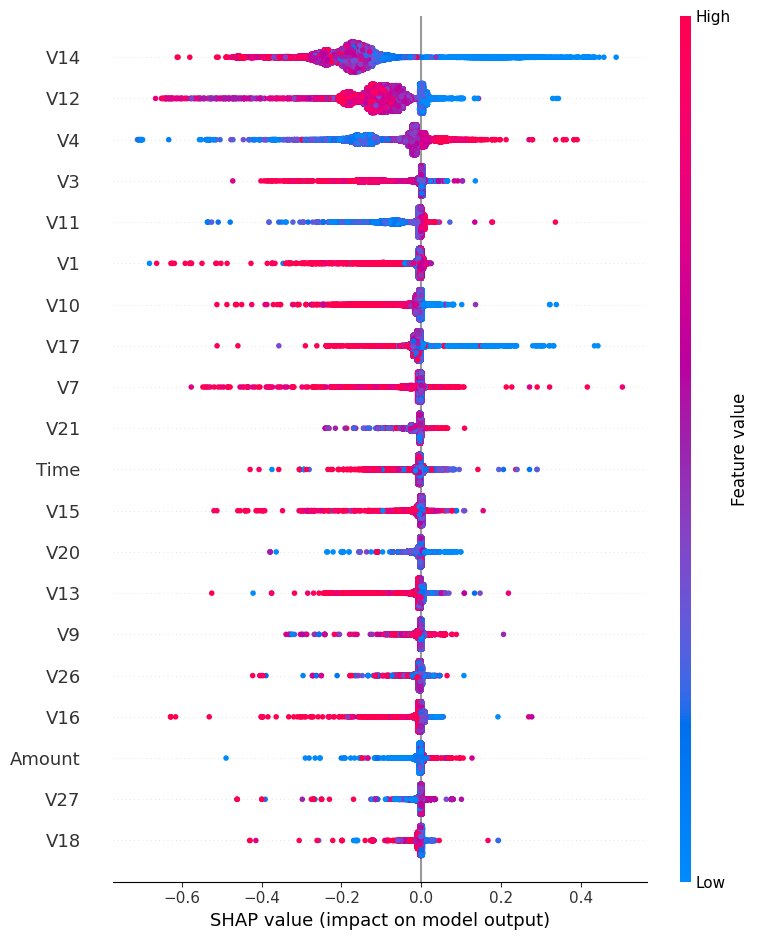

In [24]:
# Summary plot for credit card
plt.figure(figsize=(10, 6))
shap.summary_plot(dt_shap_values_credit_class_1, X_test_credit)
plt.show()

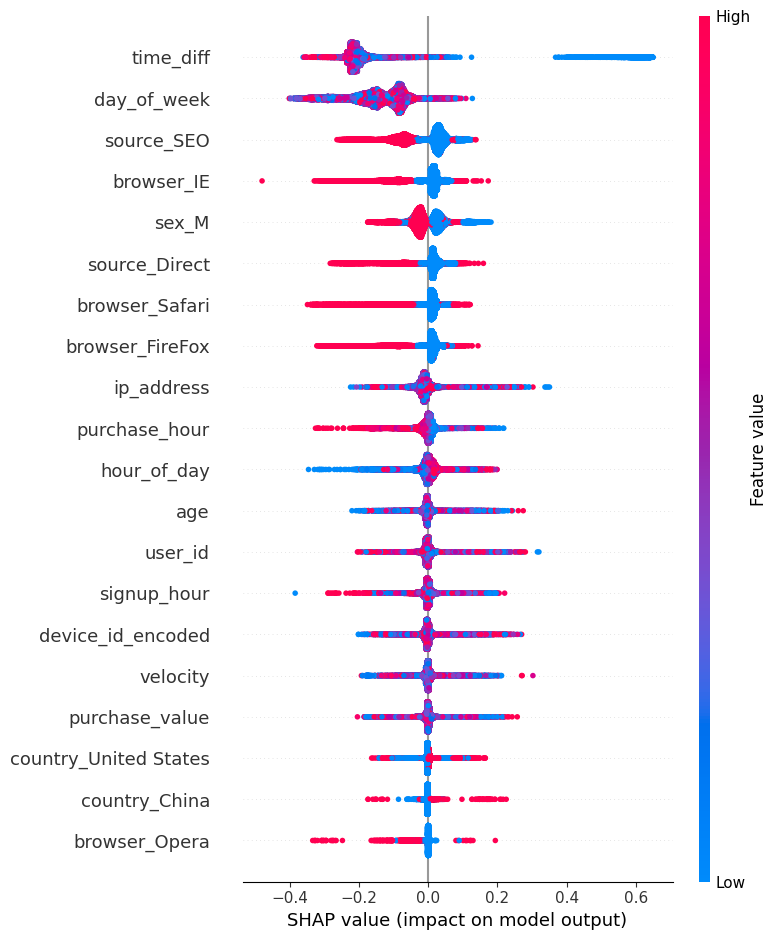

In [28]:
# Summary plot for Fraud dataset
plt.figure(figsize=(10, 6))
shap.summary_plot(dt_shap_values_fraud_class_1, X_test_fraud)
plt.show()

In [22]:
# Initialize SHAP Linear Explainer
explainer_lr_credit = shap.LinearExplainer(
    lr_creditcard, 
    X_test_credit,  # Use the background dataset
    feature_perturbation="interventional"
)

# Calculate SHAP values for the test data
shap_values_credit = explainer_lr_credit.shap_values(X_test_credit)

# Check the shape of the SHAP values
print(f"SHAP values shape: {shap_values_credit.shape}")

SHAP values shape: (56962, 30)


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-8\.venv\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [ ]:
# Initialize SHAP Explainers for Logistic Regression
lr_explainer_credit = shap.TreeExplainer(lr_creditcard)
# shap_values_credit = explainer_credit.shap_values(X_test_credit)

lr_explainer_fraud = shap.TreeExplainer(lr_fraud)
 # shap_values_fraud = explainer_fraud.shap_values(X_test_fraud)

## Gradient Boosting

In [18]:
# Initialize SHAP Explainers for Gradient Boosting
explainer_credit = shap.TreeExplainer(xgb_creditcard)
shap_values_credit = explainer_credit.shap_values(X_test_credit)

explainer_fraud = shap.TreeExplainer(xgb_fraud)
shap_values_fraud = explainer_fraud.shap_values(X_test_fraud)

In [19]:
print(f"Shape of shap_values_credit: {shap_values_credit.shape}")
print(f"Shape of X_test_credit: {X_test_credit.shape}")
print(f"Shape of shap_values_fraud: {shap_values_fraud.shape}")
print(f"Shape of X_test_fraud: {X_test_fraud.shape}")

Shape of shap_values_credit: (56962, 30, 2)
Shape of X_test_credit: (56962, 30)
Shape of shap_values_fraud: (30223, 201, 2)
Shape of X_test_fraud: (30223, 201)


In [20]:
# Use SHAP values for the positive class (index 1)
shap_values_fraud_class_1 = shap_values_fraud[:, :, 1]  # Shape: (56962, 30)

print(f"New Shape of shap_values_fraud_class_1: {shap_values_fraud_class_1.shape}")

# Use SHAP values for the positive class (index 1)
shap_values_credit_class_1 = shap_values_credit[:, :, 1]  # Shape: (56962, 30)

print(f"New Shape of shap_values_credit_class_1: {shap_values_credit_class_1.shape}")

New Shape of shap_values_fraud_class_1: (30223, 201)
New Shape of shap_values_credit_class_1: (56962, 30)


In [ ]:
# Summary plot for credit card
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_credit_class_1, X_test_credit)
plt.show()

In [25]:
# Force Plot for a Single Prediction
i = 0  # Index of the sample
shap.force_plot(
    explainer_fraud.expected_value[1],  # Use expected value for class 1
    shap_values_fraud_class_1[i],
    X_test_fraud.iloc[i]
)


In [26]:
# Force Plot for a Single Prediction
i = 0  # Index of the sample
shap.force_plot(
    explainer_credit.expected_value[1],  # Use expected value for class 1
    shap_values_credit_class_1[i],
    X_test_credit.iloc[i]
)

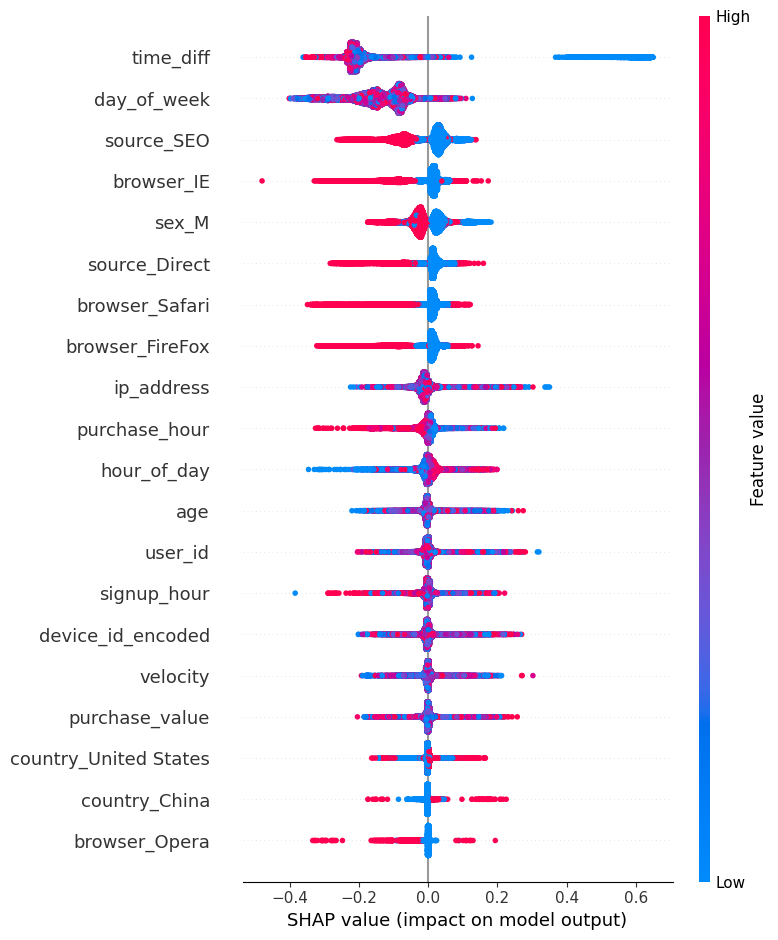

In [27]:
# Summary plot for Fraud dataset
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_fraud_class_1, X_test_fraud)
plt.show()

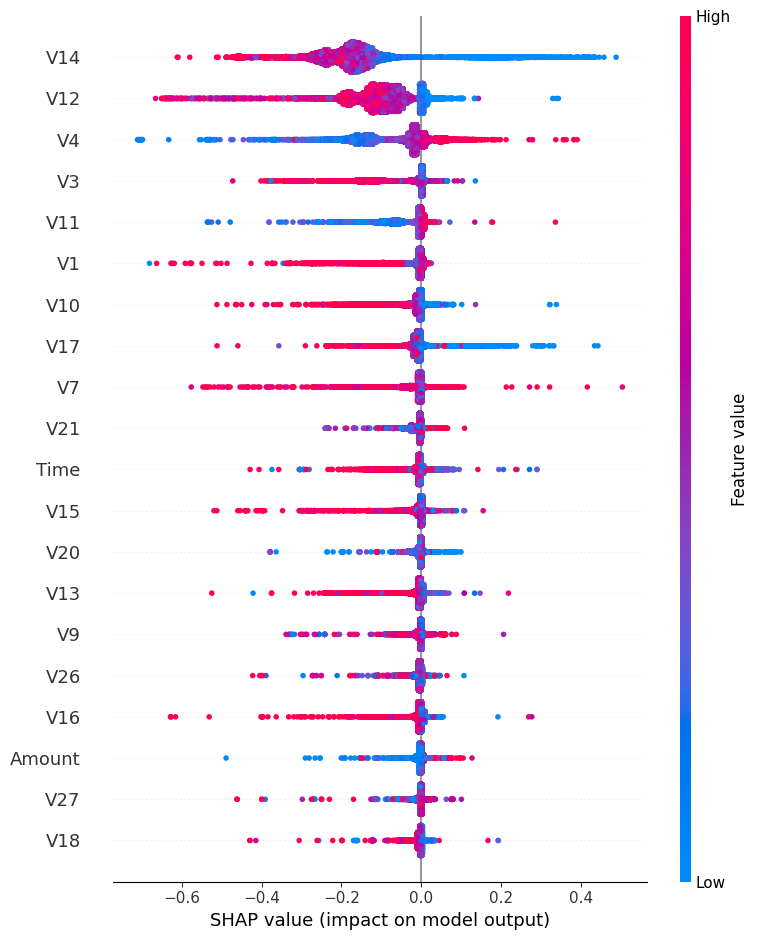

In [28]:
# Summary plot for credit card
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_credit_class_1, X_test_credit)
plt.show()